# CLASE 11 - AFTER
----
## Actividad 1: Análisis de Correlación
----

En esta actividad exploraremos la **relación entre dos variables numéricas** del conjunto de datos `diamonds`:

* El **precio** (`price`)
* Los **quilates** (`carat`)

Analizaremos específicamente los diamantes de **color "F"** y **corte "Premium"** para comprobar si existe una **correlación** entre ambas variables.

El objetivo es comprender si los diamantes más grandes (más quilates) tienden a tener un precio mayor, y visualizar esta relación mediante un **gráfico de dispersión**.


In [ ]:
# ============================================================
# 1. Filtrar los datos y calcular la correlación
# ============================================================

import seaborn as sns
import pandas as pd

# Cargamos el dataset 'diamonds'
diamonds = sns.load_dataset("diamonds")

# Filtramos solo los diamantes de color F y corte Premium
diamantes_filtrados = diamonds[
    (diamonds["color"] == "F") & (diamonds["cut"] == "Premium")
]

# Mostramos cuántos registros cumplen estas condiciones
print(f"Cantidad de diamantes seleccionados: {len(diamantes_filtrados)}")

# Calculamos la correlación entre precio y quilates
correlacion = diamantes_filtrados["price"].corr(diamantes_filtrados["carat"])

print(f"Coeficiente de correlación entre precio y quilates: {correlacion:.3f}")


Cantidad de diamantes seleccionados: 2331
Coeficiente de correlación entre precio y quilates: 0.913


### **Visualización de la relación entre precio y quilates**

Para observar gráficamente la relación entre el **precio** y los **quilates** en los diamantes de color "F" y corte "Premium", utilizaremos un **gráfico de dispersión**.

Cada punto representa un diamante:

* El eje **X** muestra los quilates (`carat`).
* El eje **Y** muestra el precio (`price`).

Si los puntos tienden a alinearse de forma ascendente, eso indica una **correlación positiva**: a mayor cantidad de quilates, mayor precio.

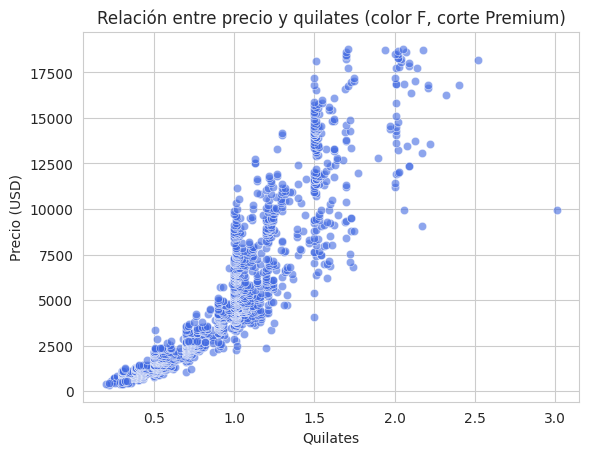

In [ ]:
# ============================================================
# 2. Gráfico de dispersión: precio vs quilates
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set_style("whitegrid")

# Crear el gráfico de dispersión
sns.scatterplot(
    data=diamantes_filtrados,
    x="carat",
    y="price",
    color="royalblue",
    alpha=0.6  # transparencia para ver zonas con muchos puntos
)

# Personalizar el gráfico
plt.title("Relación entre precio y quilates (color F, corte Premium)")
plt.xlabel("Quilates")
plt.ylabel("Precio (USD)")
plt.show()

Para **mostrar la línea que indica la correlación (tendencia lineal)** en el gráfico de dispersión, se puede usar el comando:

```python
sns.regplot()
```

en lugar de `sns.scatterplot()`.



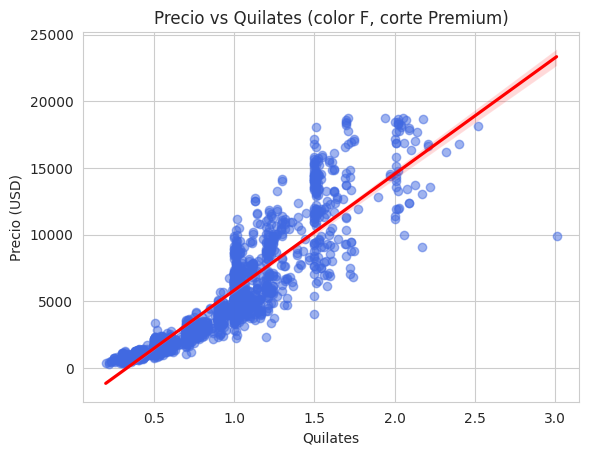

In [ ]:

# ============================================================
# Gráfico de dispersión con línea de tendencia
# ============================================================

sns.set_style("whitegrid")

# 'regplot' combina puntos de dispersión + línea de regresión lineal
sns.regplot(
    data=diamantes_filtrados,
    x="carat",
    y="price",
    scatter_kws={"alpha": 0.5, "color": "royalblue"},  # apariencia de los puntos
    line_kws={"color": "red"},                         # apariencia de la línea
)

# Personalizamos el gráfico
plt.title("Precio vs Quilates (color F, corte Premium)")
plt.xlabel("Quilates")
plt.ylabel("Precio (USD)")
plt.show()

### **Interpretación de los resultados**

El **coeficiente de correlación** obtenido indica el **grado de relación lineal** entre los **quilates** y el **precio** de los diamantes analizados. Recordemos:

* Si el valor es **cercano a +1**, existe una **correlación positiva fuerte**:
  los diamantes con más quilates tienden a tener precios más altos.
* Si fuera **cercano a 0**, no habría una relación lineal clara.
* Si fuera **negativo**, implicaría que a mayor cantidad de quilates, menor precio (algo poco probable en este caso).

En el **gráfico de dispersión**, la **línea roja** representa la **tendencia general** de la relación:
su **pendiente ascendente** confirma visualmente que el **precio aumenta con los quilates**, aunque con cierta dispersión (variabilidad) debida a otros factores como el color, la claridad o el tipo de corte.

### Resultado:

> Existe una relación positiva clara entre el tamaño (quilates) y el valor (precio) de los diamantes de color F y corte Premium.

----
## Actividad 2: Análisis Estadístico
----

En esta actividad trabajaremos con el conjunto de datos `penguins`, disponible en la librería **Seaborn**.
El dataset contiene información morfológica (medidas físicas) de tres especies de pingüinos que habitan distintas islas de la Antártida.

Nuestro objetivo será **analizar la distribución y las correlaciones** entre las variables numéricas, para identificar patrones que puedan ser útiles en estrategias de conservación.

---

### 🎯 **Objetivos**

* Analizar cómo se distribuyen los **pesos** de los pingüinos según su especie.
* Visualizar la distribución de variables clave:

  a) Longitud del pico.

  b) Longitud de la aleta.
  
* Desglosar la población según ubicación y sexo.
* Calcular y visualizar la **matriz de correlación** entre las variables numéricas.
* Identificar y representar gráficamente las **variables más correlacionadas** y las **menos correlacionadas**.

In [ ]:
# ============================================================
# 1. Importar bibliotecas y cargar el dataset "penguins"
# ============================================================

# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos "penguins" desde Seaborn
penguins = sns.load_dataset("penguins")

# Confirmamos que se haya cargado correctamente
print("Dataset cargado con éxito. Cantidad de filas y columnas:")
print(penguins.shape)

# Visualizamos las primeras filas para conocer su estructura
penguins.head()


Dataset cargado con éxito. Cantidad de filas y columnas:
(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


###  **Descripción del dataset `penguins`**

El dataset **`penguins`** contiene información sobre **pingüinos adultos** recolectada por el programa **Palmer Station LTER** en las islas del archipiélago **Palmer (Antártida)**.

Incluye **7 columnas principales** con características físicas y de contexto geográfico y biológico.

| Columna               | Tipo de dato | Descripción                                                |
| --------------------- | ------------ | ---------------------------------------------------------- |
| **species**           | categórica   | Especie del pingüino (*Adelie*, *Chinstrap* o *Gentoo*).   |
| **island**            | categórica   | Isla donde fue observado (*Biscoe*, *Dream*, *Torgersen*). |
| **bill_length_mm**    | numérica     | Longitud del pico (en milímetros).                         |
| **bill_depth_mm**     | numérica     | Profundidad del pico (en milímetros).                      |
| **flipper_length_mm** | numérica     | Longitud de la aleta (en milímetros).                      |
| **body_mass_g**       | numérica     | Peso corporal del pingüino (en gramos).                    |
| **sex**               | categórica   | Sexo del ejemplar (*Male*, *Female*).                      |

El conjunto de datos puede contener algunos valores faltantes (`NaN`), que deberán tenerse en cuenta al realizar los análisis.


### **1. Distribución de pesos según la especie**

Para comenzar, analizaremos cómo se distribuyen los **pesos corporales** (`body_mass_g`) de los pingüinos de cada especie.
Esto nos ayudará a identificar si existen diferencias notables entre ellas, lo que puede reflejar **adaptaciones morfológicas** o **hábitats distintos**.


Utilizaremos un **boxplot** (diagrama de caja) para comparar visualmente la **mediana**, la **dispersión** y los **valores atípicos** en cada grupo.

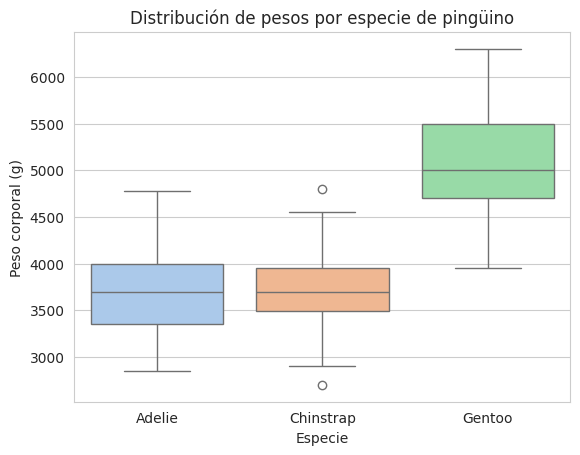

In [ ]:
# ============================================================
# 1. Distribución de pesos por especie
# ============================================================

sns.set_style("whitegrid")

# Creamos el gráfico de caja
sns.boxplot(
    data=penguins,
    x="species",       # Eje X: especie
    hue="species",
    y="body_mass_g",   # Eje Y: peso corporal
    palette="pastel"
)

# Personalizamos el gráfico
plt.title("Distribución de pesos por especie de pingüino")
plt.xlabel("Especie")
plt.ylabel("Peso corporal (g)")
plt.show()

### **2. Distribución de características clave**

En este paso analizaremos dos variables morfológicas importantes:

a) **Longitud del pico** (`bill_length_mm`)
b) **Longitud de la aleta** (`flipper_length_mm`)

Estas medidas permiten diferenciar las especies y pueden estar relacionadas con su tipo de alimentación o entorno.
Usaremos **histogramas con curvas de densidad (KDE)** para visualizar cómo se distribuyen ambas variables en el conjunto de datos.


/tmp/ipython-input-1459820086.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


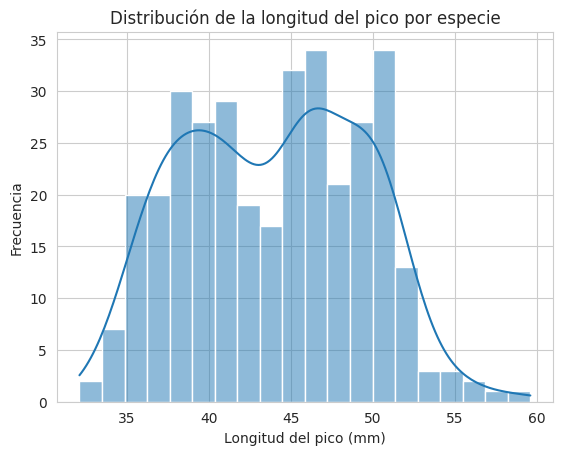

In [ ]:
# ============================================================
# 2.a) Distribución de la longitud del pico
# ============================================================

sns.histplot(
    data=penguins,
    x="bill_length_mm",
    # hue="species",        # Distinción por especie
    kde=True,             # Agrega curva de densidad
    palette="Set2",
    bins=20
)

plt.title("Distribución de la longitud del pico por especie")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-929508452.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


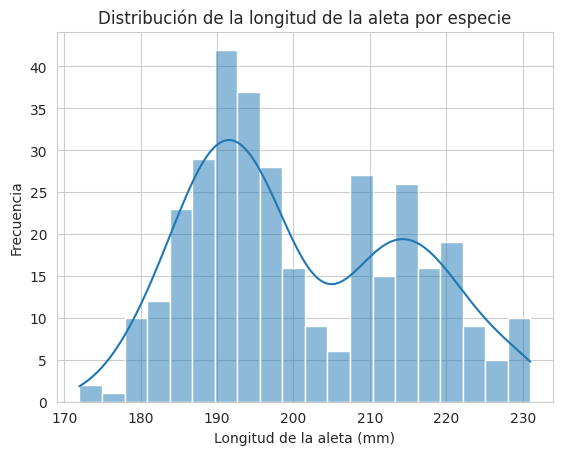

In [ ]:
# ============================================================
# 2.b) Distribución de la longitud de la aleta
# ============================================================

sns.histplot(
    data=penguins,
    x="flipper_length_mm",
    # hue="species",
    kde=True,
    palette="Set1",
    bins=20
)

plt.title("Distribución de la longitud de la aleta por especie")
plt.xlabel("Longitud de la aleta (mm)")
plt.ylabel("Frecuencia")
plt.show()

### **3. Desglose por ubicación geográfica**

Ahora analizaremos cuántos pingüinos fueron observados en cada isla y cómo se distribuyen por **sexo** y **especie**.
Esto nos permitirá identificar diferencias en la **población de cada isla**, lo cual puede ser importante para entender su distribución natural y planificar estrategias de conservación.

---

#### a) Distribución de ejemplares por sexo




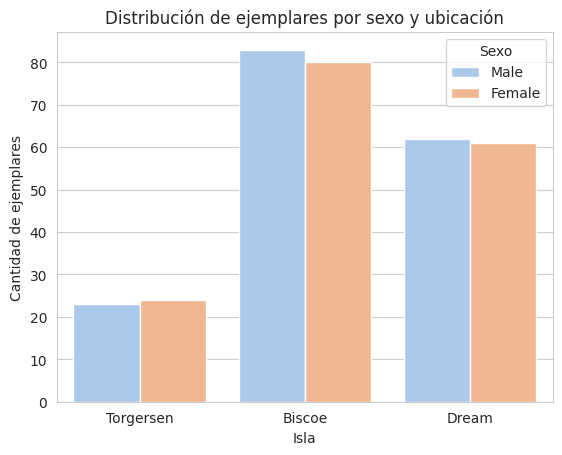

In [ ]:
# ============================================================
# 3.a) Distribución de ejemplares por sexo y ubicación
# ============================================================

sns.set_style("whitegrid")

sns.countplot(
    data=penguins,
    x="island",         # Eje X: isla
    hue="sex",          # Colores: sexo
    palette="pastel"
)

plt.title("Distribución de ejemplares por sexo y ubicación")
plt.xlabel("Isla")
plt.ylabel("Cantidad de ejemplares")
plt.legend(title="Sexo")
plt.show()

#### b) Distribución de ejemplares por especie

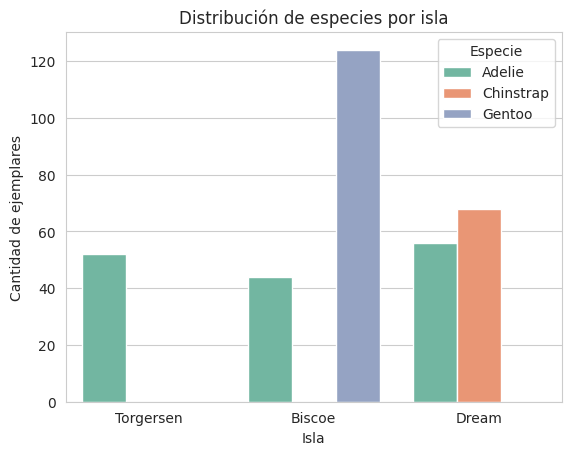

In [ ]:
# ============================================================
# 3.b) Distribución de ejemplares por especie y ubicación
# ============================================================

sns.countplot(
    data=penguins,
    x="island",
    hue="species",
    palette="Set2"
)

plt.title("Distribución de especies por isla")
plt.xlabel("Isla")
plt.ylabel("Cantidad de ejemplares")
plt.legend(title="Especie")
plt.show()

#### c) Desafío: distribución conjunta por especie **y** sexo

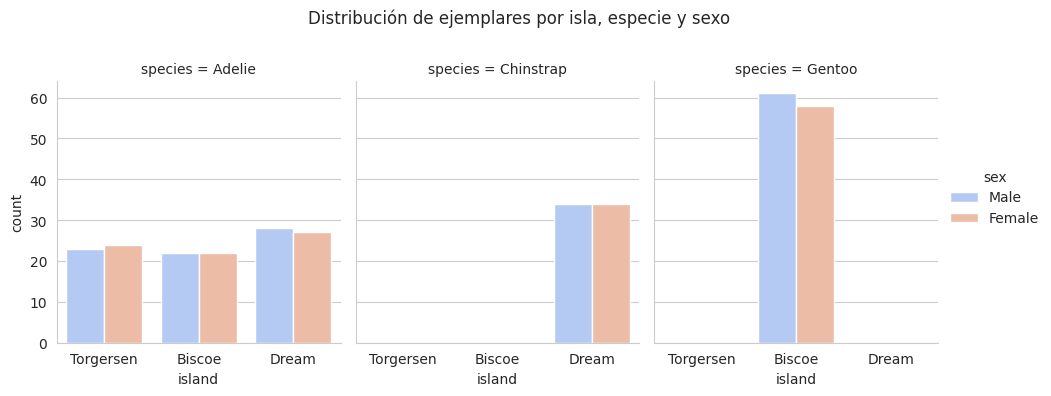

In [ ]:
# ============================================================
# 3.c) Desafío: ejemplares por especie, sexo y ubicación
# ============================================================

sns.catplot(
    data=penguins,
    x="island",
    hue="sex",
    col="species",      # Una columna por especie
    kind="count",
    palette="coolwarm",
    height=4,
    aspect=0.8
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Distribución de ejemplares por isla, especie y sexo", fontsize=12)
plt.show()

### **4. Matriz de correlación**

La **matriz de correlación** nos permite medir la **fuerza y dirección de la relación lineal** entre variables numéricas.
Cada valor del rango **[-1, 1]** representa:

* **1:** correlación positiva perfecta (una variable aumenta cuando la otra también).
* **-1:** correlación negativa perfecta (una variable aumenta cuando la otra disminuye).
* **0:** sin correlación lineal.

Analizaremos las variables numéricas del dataset `penguins`:
`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`.

Luego, representaremos los resultados en un **mapa de calor (heatmap)** que facilita la interpretación visual.

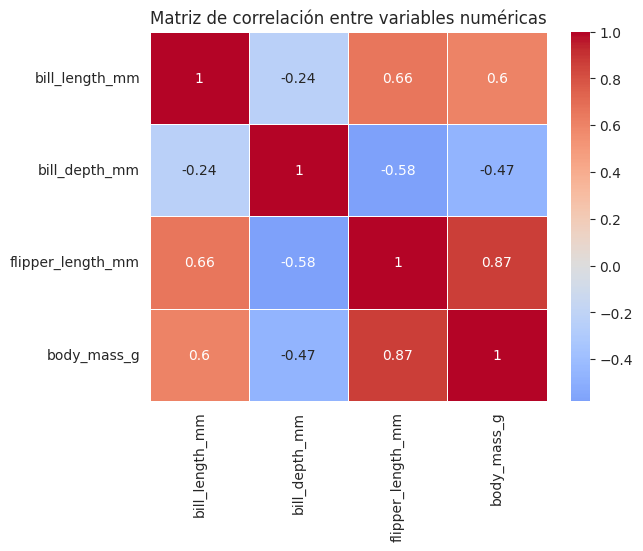

In [ ]:
# ============================================================
# 4. Calcular y visualizar la matriz de correlación
# ============================================================

# Seleccionamos solo las columnas numéricas relevantes
variables_numericas = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# Calculamos la matriz de correlación (por defecto usa Pearson)
matriz_corr = variables_numericas.corr().round(2)

# Visualizamos con un mapa de calor
sns.heatmap(
    matriz_corr,
    annot=True,         # Muestra los valores dentro del gráfico
    cmap="coolwarm",    # Paleta de colores
    center=0,           # Centra el color en 0
    linewidths=0.5
)

plt.title("Matriz de correlación entre variables numéricas")
plt.show()

### **5. Exploración e interpretación de las correlaciones**

Una vez calculada la matriz, podemos identificar:

* Las **pares de variables con mayor correlación positiva**, que crecen o decrecen juntas.
* Las **pares con menor correlación (o negativa)**, que muestran relaciones inversas o independientes.

Esto nos ayuda a descubrir qué características físicas de los pingüinos **varían de manera conjunta** (por ejemplo, si los individuos más pesados también tienen aletas más largas).




In [ ]:
# ============================================================
# 5.1 Identificar las mayores y menores correlaciones
# ============================================================

# "Desarmamos" la matriz para obtener pares de variables
corr_pairs = matriz_corr.unstack().sort_values(ascending=False)

# Filtramos para no mostrar correlaciones de una variable consigo misma (=1)
corr_pairs = corr_pairs[corr_pairs < 1]

# Mostramos las 3 correlaciones más altas y las 3 más bajas
print("Mayores correlaciones:\n")
print(corr_pairs.head(3))

print("\nMenores correlaciones:\n")
print(corr_pairs.tail(3))

Mayores correlaciones:

flipper_length_mm  body_mass_g          0.87
body_mass_g        flipper_length_mm    0.87
bill_length_mm     flipper_length_mm    0.66
dtype: float64

Menores correlaciones:

bill_depth_mm      body_mass_g         -0.47
                   flipper_length_mm   -0.58
flipper_length_mm  bill_depth_mm       -0.58
dtype: float64


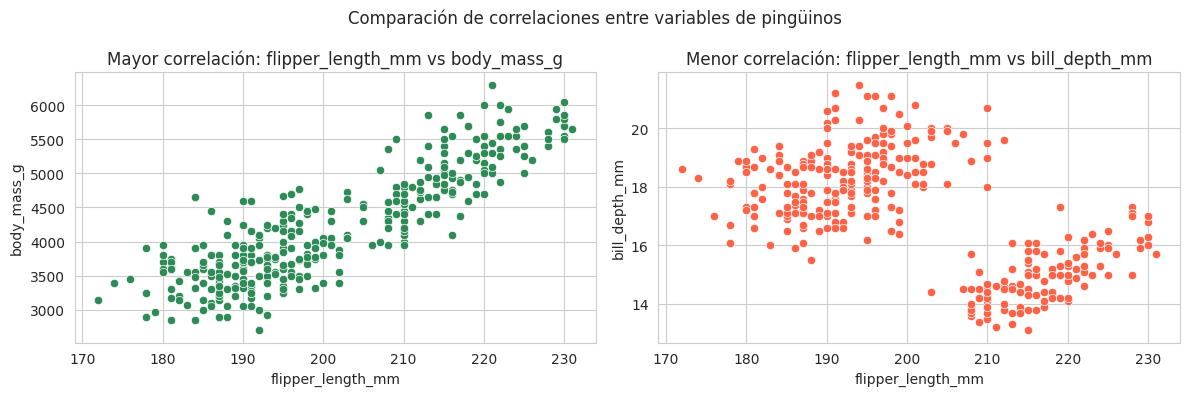

In [ ]:
# ============================================================
# 5.2 Visualizar las correlaciones más altas y más bajas
# ============================================================

# Extraemos las variables más y menos correlacionadas
mayor_par = corr_pairs.head(1).index[0]
menor_par = corr_pairs.tail(1).index[0]

# Creamos dos gráficos de dispersión para comparar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de la correlación más alta
sns.scatterplot(
    data=penguins,
    x=mayor_par[0],
    y=mayor_par[1],
    color="seagreen",
    ax=axes[0]
)
axes[0].set_title(f"Mayor correlación: {mayor_par[0]} vs {mayor_par[1]}")

# Gráfico de la correlación más baja
sns.scatterplot(
    data=penguins,
    x=menor_par[0],
    y=menor_par[1],
    color="tomato",
    ax=axes[1]
)
axes[1].set_title(f"Menor correlación: {menor_par[0]} vs {menor_par[1]}")

plt.suptitle("Comparación de correlaciones entre variables de pingüinos", fontsize=12)
plt.tight_layout()
plt.show()

### **Interpretación de los resultados**

El análisis de correlación permite comprender cómo se **relacionan las características físicas** de los pingüinos entre sí, lo cual es clave para estudiar su **adaptación al entorno** y diseñar estrategias de conservación.

#### **Principales hallazgos:**

* Las variables con **mayor correlación positiva** suelen ser **la longitud de la aleta (`flipper_length_mm`)** y el **peso corporal (`body_mass_g`)**.

> Esto indica que los pingüinos más grandes y pesados tienden a tener también aletas más largas, una relación esperable desde el punto de vista biológico.

* Las variables con **baja o nula correlación** pueden representar **rasgos independientes**, como la profundidad del pico respecto a la longitud de la aleta, lo que sugiere que esas dimensiones no necesariamente varían juntas.

#### **Interpretación ecológica:**

Estas correlaciones ayudan a entender cómo las distintas especies se **diferencian morfológicamente**.
Por ejemplo:

* Los **pingüinos Gentoo**, típicamente más grandes, muestran valores altos en peso y longitud de aleta.
* Los **Adelie** y **Chinstrap** presentan medidas más moderadas.

Estos patrones podrían reflejar **diferencias en dieta, hábitat o comportamiento de buceo**, factores que deben considerarse al planificar estrategias de monitoreo y conservación.
